In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import scipy.integrate

## モンテカルロ積分の収束テスト
- 例3.3の場合

In [3]:
N = 10000

In [4]:
a, b = 0, 1
h = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

## scipy.integrateで積分を計算

In [5]:
I = scipy.integrate.quad(h, a, b)[0]
print("scipy.integrate:", I)

scipy.integrate: 0.9652009360501453


## モンテカルロ積分の収束テスト

In [6]:
x = h(uniform(loc=a, scale=b-a).rvs(size=N))

## サンプル数1のh_1からサンプル数のh_Nまで推定値をまとめて求める

In [7]:
estint = np.cumsum(x) / np.arange(1, N+1)

## サンプル数1のsqrt(v_1)からサンプル数Nのsqrt(v_N)まで標準偏差をまとめて求める

In [8]:
esterr = np.sqrt(np.cumsum((x - estint) ** 2)) / np.arange(1, N + 1)

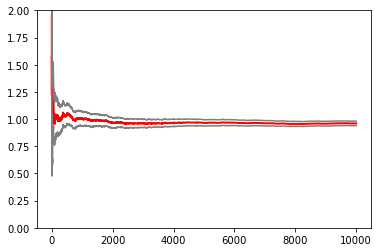

In [9]:
plt.plot(estint, color='red', linewidth=2)
plt.plot(estint + 2 * esterr, color='gray')
plt.plot(estint - 2 * esterr, color='gray')
plt.ylim((0, 2))
plt.show()

## 積分の収束テスト

In [10]:
from scipy.stats import cauchy, norm

In [11]:
N = 1000
x = 4

## scipy.integrateでの積分

In [12]:
h1 = lambda t: t * norm(loc=x).pdf(t) * cauchy.pdf(t)
h2 = lambda t: norm(loc=x).pdf(t) * cauchy.pdf(t)
inf = float('inf')
num = scipy.integrate.quad(h1, -inf, inf)[0]
den = scipy.integrate.quad(h2, -inf, inf)[0]
I = num / den
print("scipy.integrate:", I)

scipy.integrate: 3.435061555229311


## コーシー分布からサンプリングするモンテカルロ積分の収束テスト
- 分子も分母も同じサンプルを使用すると仮定

In [14]:
theta = cauchy.rvs(size=N)
num = theta * norm(loc=x).pdf(theta)
den = norm(loc=x).pdf(theta)

In [15]:
num = num[den != 0]
den = den[den != 0]
Ndash = len(num)

In [19]:
y = num / den
estint = (np.cumsum(num) / np.arange(1, Ndash + 1)) / (np.cumsum(den) / np.arange(1, Ndash + 1))
esterr = np.sqrt(np.cumsum((y - estint) ** 2)) / np.arange(1, Ndash + 1)

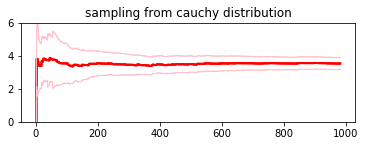

In [21]:
plt.subplot(2, 1, 1)
plt.plot(estint, color='red', linewidth=2)
plt.plot(estint + 2 * esterr, color='pink', linewidth=1)
plt.plot(estint - 2 * esterr, color='pink', linewidth=1)
plt.title('sampling from cauchy distribution')
plt.ylim((0, 6))
plt.show()

## 正規分布からサンプリングするモンテカルロ積分の収束テスト

In [22]:
theta = norm(loc=x).rvs(size=N)
num = theta * cauchy.pdf(theta)
den = cauchy.pdf(theta)

In [23]:
num = num[den != 0]
den = den[den != 0]
Ndash = len(num)

In [24]:
y = num / den
estint = (np.cumsum(num) / np.arange(1, Ndash + 1)) / (np.cumsum(den) / np.arange(1, Ndash + 1))
esterr = np.sqrt(np.cumsum((y - estint) ** 2)) / np.arange(1, Ndash + 1)

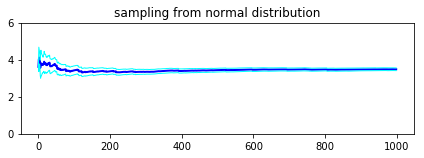

In [25]:
plt.subplot(2, 1, 2)
plt.plot(estint, color='blue', linewidth=2)
plt.plot(estint + 2 * esterr, color='cyan', linewidth=1)
plt.plot(estint - 2 * esterr, color='cyan', linewidth=1)
plt.title('sampling from normal distribution')
plt.ylim((0, 6))

plt.tight_layout()
plt.show()